In [1]:
import yfinance as yf
from binance import Client

In [2]:
def getStock(tic,start_period):
    ticker = yf.Ticker(tic)
    df = ticker.history(start=start_period)
    return df.values[:,:4],df.index

In [3]:
def getMonthly(tic,period):
    ticker = yf.Ticker(tic)
    df = ticker.history(period=period)
    df['month'] = [d.month for d in df.index]
    df = df.groupby(['month']).mean()
    return df.values[:,:4],df.index

In [4]:
def getBTC(tic,start_period):
    #api_key = os.environ['API_KEY']
    #api_secret = os.environ['API_SECRET']
    client = Client()
    klines = client.get_historical_klines(tic, Client.KLINE_INTERVAL_1DAY, start_period, limit=1000)
    df = pd.DataFrame(klines, columns=['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteVolume',
                                       'NumTrades', 'BuyBaseVolume', 'BuyQuoteVolume', 'Other']
                      ,dtype=np.float32)
    df['DateTime'] = df['OpenTime'].apply(lambda x: datetime.fromtimestamp(x / 1000))
    df = df.set_index('DateTime')
    return df.values[:, 1:5], df.index


In [ ]:
import pandas as pd
tic="BTCUSDT"
balance_usdt = client.get_asset_balance(asset='USDT')
df = pd.DataFrame(client.get_ticker())
price = float(df[df.symbol == tic]['lastPrice'].values[0])
fee = client.get_trade_fee(symbol=tic)
print(str(price),fee[0]['makerCommission'])

In [ ]:
from binance.enums import *
from decimal import *
fee_pct = float(fee[0]['makerCommission'])
qty = 100.0 * (1 - fee_pct) / price
print("exec buy order at : ", price, round(qty,5), fee_pct, price * qty)
#order = client.create_order(
            symbol=tic,
            side=SIDE_BUY,
            type=ORDER_TYPE_LIMIT,
            timeInForce=TIME_IN_FORCE_GTC,
            quantity=round(qty,5),
            price=str(price) )
print(order)

In [5]:
stock = 'AAPL'
data,ts = getStock(stock,'2017-12-01')

In [6]:
data

array([[ 40.7505943 ,  41.15946476,  40.27477849,  41.09012604],
       [ 40.63582534,  41.04708554,  40.28912441,  40.89884186],
       [ 41.24076276,  41.27423726,  40.5593168 ,  40.59996414],
       ...,
       [182.63000488, 182.94000244, 179.11999512, 179.69999695],
       [179.61000061, 180.16999817, 174.63999939, 174.91999817],
       [172.69999695, 175.30000305, 172.11999512, 172.61000061]])

In [ ]:
stock = 'BTCUSDT'
data,ts = getBTC(stock,'2017-12-01')

In [ ]:
from decimal import *
df = pd.DataFrame(client.get_ticker())
price = float(df[df.symbol == 'BTCUSDT']['lastPrice'].values[0])
Decimal(100/price)

In [7]:
from All_Functions_Master_File import rsi,adder,ma

In [8]:
my_data = adder(data,5)
my_data = rsi(my_data,14,3,4)
my_data = ma(my_data,20,4,5)


/Users/kahingleung/PycharmProjects/timeseries/All_Functions_Master_File.py:168: RuntimeWarning: Mean of empty slice.
  Data[i, where] = (Data[i - lookback + 1:i + 1, close].mean())
/Users/kahingleung/PycharmProjects/timeseries/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
my_data[1:10,:]

array([[38.92409076, 40.15569611, 38.85446565, 39.67553711, 43.68759984,
        50.19216806,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [39.95162447, 40.62144456, 39.67793403, 40.59743881, 50.56602381,
        50.26303966,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [42.06912553, 42.67412683, 41.72581363, 42.39083481, 60.63843639,
        50.55934706,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [42.22518383, 42.61411145, 41.87946877, 42.46766281, 61.00499629,
        50.77949729,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [42.79416429, 44.23464107, 42.7749575 , 44.13380814, 67.97113589,
        51.75276104,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [44.45792395, 45.05572328, 44.35469152, 44.453125  , 69.11005784,
        52.64136336,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [10]:
from datetime import datetime
ts = ts[-1*len(my_data):]
mth = [d.month for d in ts]
yr = [d.year for d in ts]
wd = [d.weekday() for d in ts]
wk = [d.isocalendar()[1] for d in ts]
day = [d.day for d in ts]

In [11]:
import pandas as pd
df = pd.DataFrame({'Y': my_data[:,5], 'month': mth, 'year': yr, 'weekday': wd, 'weeknum': wk, 'day': day})
dfm = df.groupby(['month']).mean().reset_index()
dfwd = df.groupby(['weekday']).mean().reset_index()
dfwk = df.groupby(['weeknum']).mean().reset_index()
dfymd = df[['Y','year','month']].groupby(['year','month']).mean().reset_index()

In [12]:
dfymd.merge(dfm[['Y','month']],  on='month',suffixes=['_true','_pred']).sort_values(by=['year','month']).reset_index()

,index,year,month,Y_true,Y_pred
0,0,2018,4,50.246710,56.707618
1,4,2018,5,57.770074,57.385129
2,8,2018,6,63.277496,56.186681
3,12,2018,7,52.246505,62.445327
4,16,2018,8,67.549648,63.471274
5,20,2018,9,70.993521,61.699551
6,24,2018,10,54.823977,53.331895
7,28,2018,11,42.296796,55.967980
8,32,2018,12,33.857187,57.396308
9,36,2019,1,36.618935,58.036555


In [33]:
df_pred = dfymd.merge(dfm[['Y','month']],  on='month',suffixes=['_true','_pred']).sort_values(by=['year','month']).reset_index()
Y_true = df_pred['Y_true'].values
Y_pred = df_pred['Y_pred'].values
Y18 = df_pred[df_pred.year == 2018]['Y_pred']
Y19 = df_pred[df_pred.year == 2019]['Y_pred']
Y20 = df_pred[df_pred.year == 2020]['Y_pred']
Y21 = df_pred[df_pred.year == 2021]['Y_pred']

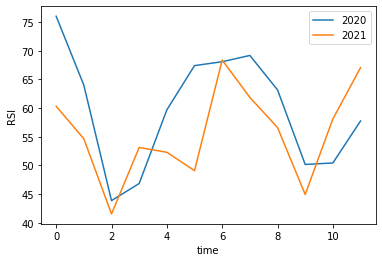

In [34]:
import matplotlib.pyplot as plt
# plot the co2 data
fig = plt.figure()
df1 = df_pred[df_pred.year == 2020].reset_index()
df2 = df_pred[df_pred.year == 2021].reset_index()
plt.plot(df1.index,df1['Y_true'], label="2020")
plt.plot(df2.index,df2['Y_true'], label="2021")
plt.ylabel('RSI')
plt.xlabel('time')
plt.legend()

In [35]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_true,Y_pred))

7.413284386830308


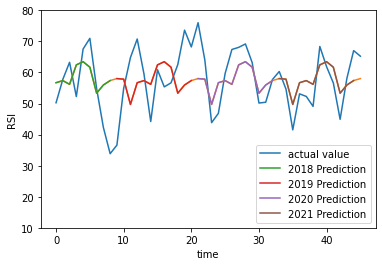

In [36]:
import matplotlib.pyplot as plt
# plot the co2 data
fig = plt.figure()
#plt.plot(df19.index,df19.values)
plt.plot(df_pred.index,Y_true, label="actual value")
plt.plot(df_pred.index,Y_pred)
plt.plot(Y18.index,Y18.values, label="2018 Prediction")
plt.plot(Y19.index,Y19.values, label="2019 Prediction")
plt.plot(Y20.index,Y20.values, label="2020 Prediction")
plt.plot(Y21.index,Y21.values, label="2021 Prediction")
plt.ylabel('RSI')
plt.xlabel('time')
plt.ylim(10, 80)
plt.legend()

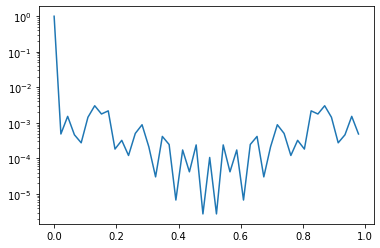

In [37]:
import numpy as np

y = Y_true #my_data[:,5]
x = list(range(len(y)))

# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(y))

# get the list of frequencies
num=np.size(x)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

In [38]:
len(df[df.year == 2020])

253

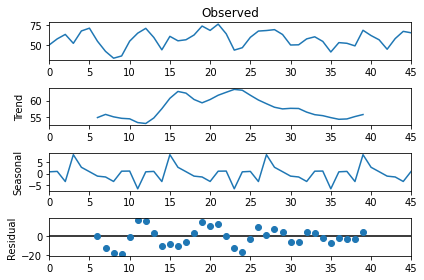

In [39]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(Y_true,period=12)
resplot = res.plot()


In [40]:
r = res.resid
r = r[~np.isnan(r)]

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.626191
p-value: 0.000001
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


In [43]:
result[1]

1.1159888733544993e-06

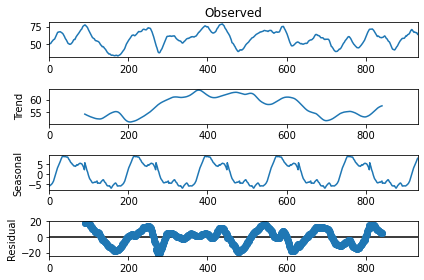

In [24]:
import statsmodels.api as sm
y = my_data[:,5]
res = sm.tsa.seasonal_decompose(y,period=180)
resplot = res.plot()

In [25]:
r = res.resid
r = r[~np.isnan(r)]

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(r)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.449055
p-value: 0.000003
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [ ]:
result[1]

In [ ]:
plt.hist(r, bins = 50)

In [46]:
from prophet import Prophet

In [47]:
df

,Y,month,year,weekday,weeknum,day
0,50.301251,4,2018,4,17,27
1,50.192168,4,2018,0,18,30
2,50.263040,5,2018,1,18,1
3,50.559347,5,2018,2,18,2
4,50.779497,5,2018,3,18,3
...,...,...,...,...,...,...
927,66.028598,12,2021,4,52,31
928,66.253801,1,2022,0,1,3
929,66.001389,1,2022,1,1,4
930,65.017097,1,2022,2,1,5


In [48]:
df['ds'] = df.apply(lambda x: datetime(int(x['year']),int(x['month']),int(x['day'])),axis = 1)
df['y'] = df['Y']

In [49]:
df

,Y,month,year,weekday,weeknum,day,ds,y
0,50.301251,4,2018,4,17,27,2018-04-27,50.301251
1,50.192168,4,2018,0,18,30,2018-04-30,50.192168
2,50.263040,5,2018,1,18,1,2018-05-01,50.263040
3,50.559347,5,2018,2,18,2,2018-05-02,50.559347
4,50.779497,5,2018,3,18,3,2018-05-03,50.779497
...,...,...,...,...,...,...,...,...
927,66.028598,12,2021,4,52,31,2021-12-31,66.028598
928,66.253801,1,2022,0,1,3,2022-01-03,66.253801
929,66.001389,1,2022,1,1,4,2022-01-04,66.001389
930,65.017097,1,2022,2,1,5,2022-01-05,65.017097


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.7018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1652.03     0.0188178       158.215           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1659.68    0.00125496       84.7088      0.6399      0.6399      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249        1661.6    0.00102888       97.7371   1.257e-05       0.001      344  LS failed, Hessian reset 
     299       1661.98   3.14355e-05       81.7974      0.2842           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1662.18   1.62122e-07       76.0628      0.5552      0.5552      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       1662.19   9.38301e-05    

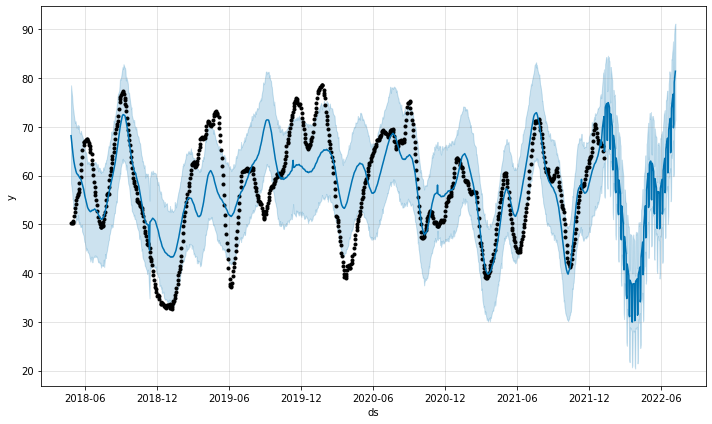

In [51]:
dfph = df[['ds','y']]
m = Prophet(yearly_seasonality=True)
m.add_seasonality(name='half_year', period=182,fourier_order=5)
m.add_country_holidays(country_name='US')
m.fit(dfph)
future = m.make_future_dataframe(periods=182)
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-04-27,61.152042,58.484115,78.546421,61.152042,61.152042,0.0,0.0,0.0,0.0,...,2.135867,2.135867,2.135867,129.497895,129.497895,129.497895,0.0,0.0,0.0,68.205926
1,2018-04-30,60.990838,56.538504,76.018539,60.990838,60.990838,0.0,0.0,0.0,0.0,...,2.222368,2.222368,2.222368,131.383107,131.383107,131.383107,0.0,0.0,0.0,65.823367
2,2018-05-01,60.937104,55.153717,74.752256,60.937104,60.937104,0.0,0.0,0.0,0.0,...,2.311393,2.311393,2.311393,131.405331,131.405331,131.405331,0.0,0.0,0.0,65.162770
3,2018-05-02,60.883369,55.418337,73.729507,60.883369,60.883369,0.0,0.0,0.0,0.0,...,2.217886,2.217886,2.217886,131.169995,131.169995,131.169995,0.0,0.0,0.0,64.368194
4,2018-05-03,60.829635,53.368374,73.340832,60.829635,60.829635,0.0,0.0,0.0,0.0,...,2.208360,2.208360,2.208360,130.707921,130.707921,130.707921,0.0,0.0,0.0,63.711274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2022-07-03,58.004143,60.615806,80.332121,55.755769,60.005090,0.0,0.0,0.0,0.0,...,-5.547938,-5.547938,-5.547938,23.512628,23.512628,23.512628,0.0,0.0,0.0,70.611050
1110,2022-07-04,58.016625,69.245366,89.034103,55.746780,60.027948,0.0,0.0,0.0,0.0,...,2.222368,2.222368,2.222368,18.660393,18.660393,18.660393,0.0,0.0,0.0,79.169564
1111,2022-07-05,58.029108,69.764976,90.409043,55.736532,60.067721,0.0,0.0,0.0,0.0,...,2.311393,2.311393,2.311393,13.628749,13.628749,13.628749,0.0,0.0,0.0,80.037886
1112,2022-07-06,58.041590,71.097534,91.031788,55.728389,60.109957,0.0,0.0,0.0,0.0,...,2.217886,2.217886,2.217886,8.418052,8.418052,8.418052,0.0,0.0,0.0,80.706405


In [ ]:
len(forecast.iloc[-100:]['yhat'].values)

In [ ]:
pred_period = 5
pred = forecast.iloc[-1*pred_period:]['yhat'].values

In [ ]:
pred[0]